## 2장-2절-1. 다중회귀분석 - VIF 이용한 변수제거

In [1]:
## 경고문구 없애기
import warnings
warnings.filterwarnings('ignore')
# 기본 패키지 import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 관련 패키지
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 데이터 불러오기

In [5]:
os.getcwd()

'C:\\Users\\rbtkd\\ADP_codingbook\\회귀'

In [7]:
# 데이터 불러오기
boston = pd.read_csv("./data/Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [9]:
# 타겟 제외
boston_data = boston.drop(['Target'],axis=1)

---
---

## 01. crim, rm, lstat 변수로 다중회귀

In [48]:
# x데이터, y데이터 저장
x_data1 = boston[['CRIM','RM','LSTAT']]
target = boston[['Target']]

In [49]:
# 상수항 추가
x_data1_ = sm.add_constant(x_data1, has_constant='add')

In [50]:
# 회귀모델 적합
model1 = sm.OLS(target,x_data1_)
fitted_model1 = model1.fit()

In [51]:
# 결과출력
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          1.01e-112
Time:                        17:19:38   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
---

## 02. 모든 변수로 다중회귀 후 비교 후 분석

In [52]:
# x데이터, y데이터 저장
x_data2 = boston[['CRIM','RM','LSTAT','B','TAX','AGE','ZN','NOX','INDUS']]
target = boston[['Target']]

In [53]:
# 상수항추가
x_data2_= sm.add_constant(x_data2,has_constant='add')

In [54]:
# 회귀모델 적합
model_all = sm.OLS(target,x_data2_)
fitted_model_all = model_all.fit()

In [55]:
# 결과출력
fitted_model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          5.76e-111
Time:                        17:19:49   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 결과해석
- 6개의 변수가 추가됬음에도 불구하고 알스퀘어값 조금밖에 늘어나지 않음
    - 즉, 두 모델중에 고른다면 무조건 파라미터 적은 것을 골라야 한다.
- NOX, INDUS 등은 pvalue가 높다. => 이것들 제외시키면 다른 변수의 pvalue 낮아진다.
    - 변수의 개수가 많아질수록 계수가 낮아지는 것과 같은 원리(결과에 미치는 영향이 적어짐으로)
- CRIM, AGE의 pvalue는 애매하다. => 주관적인 판단이 있어야함
    - 범죄률이 집값에 영향을 미칠 것 같다는 판단을 하고 넣을 수 있다.
- [2] The condition number is large, 1.04e+04. This might indicate that there are strong multicollinearity or other numerical problems.
    - 다중공선성이 존재한다는 것을 알려주는 알림

In [43]:
# 회귀계수
fitted_model_all.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

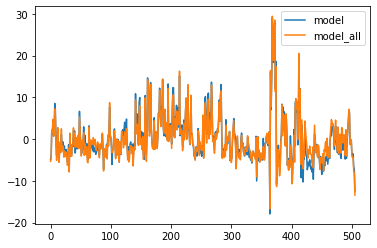

In [44]:
# model1과 model_all의 잔차비교

import matplotlib.pyplot as plt
fitted_model1.resid.plot(label="model")
fitted_model_all.resid.plot(label="model_all")
plt.legend()

=> 잔차에 큰 차이가 없다.

즉, 두 모델의 변수개수 차이에 비해 모델의 설명력이 별 차이 없다.

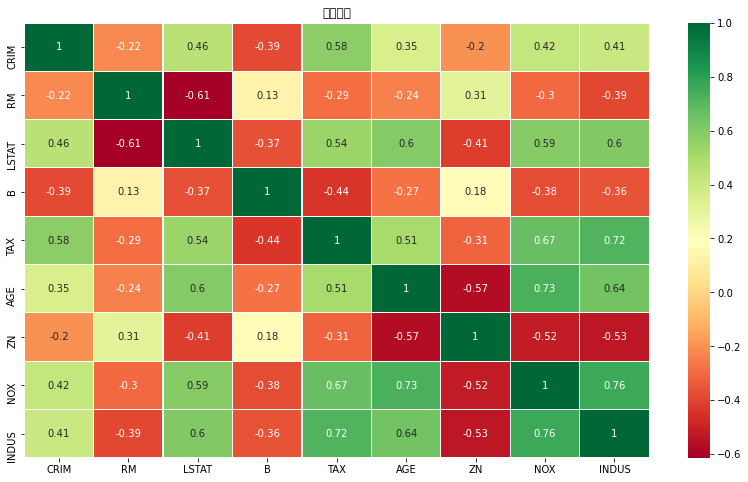

In [61]:
# 상관계수 확인
import seaborn as sns
corr = x_data2.corr()

mask = np.zeros_like(corr, dtype=np.bool)

plt.figure(figsize=(14,8))
plt.title('상관계수')

sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn',linewidth=0.2)
plt.show()

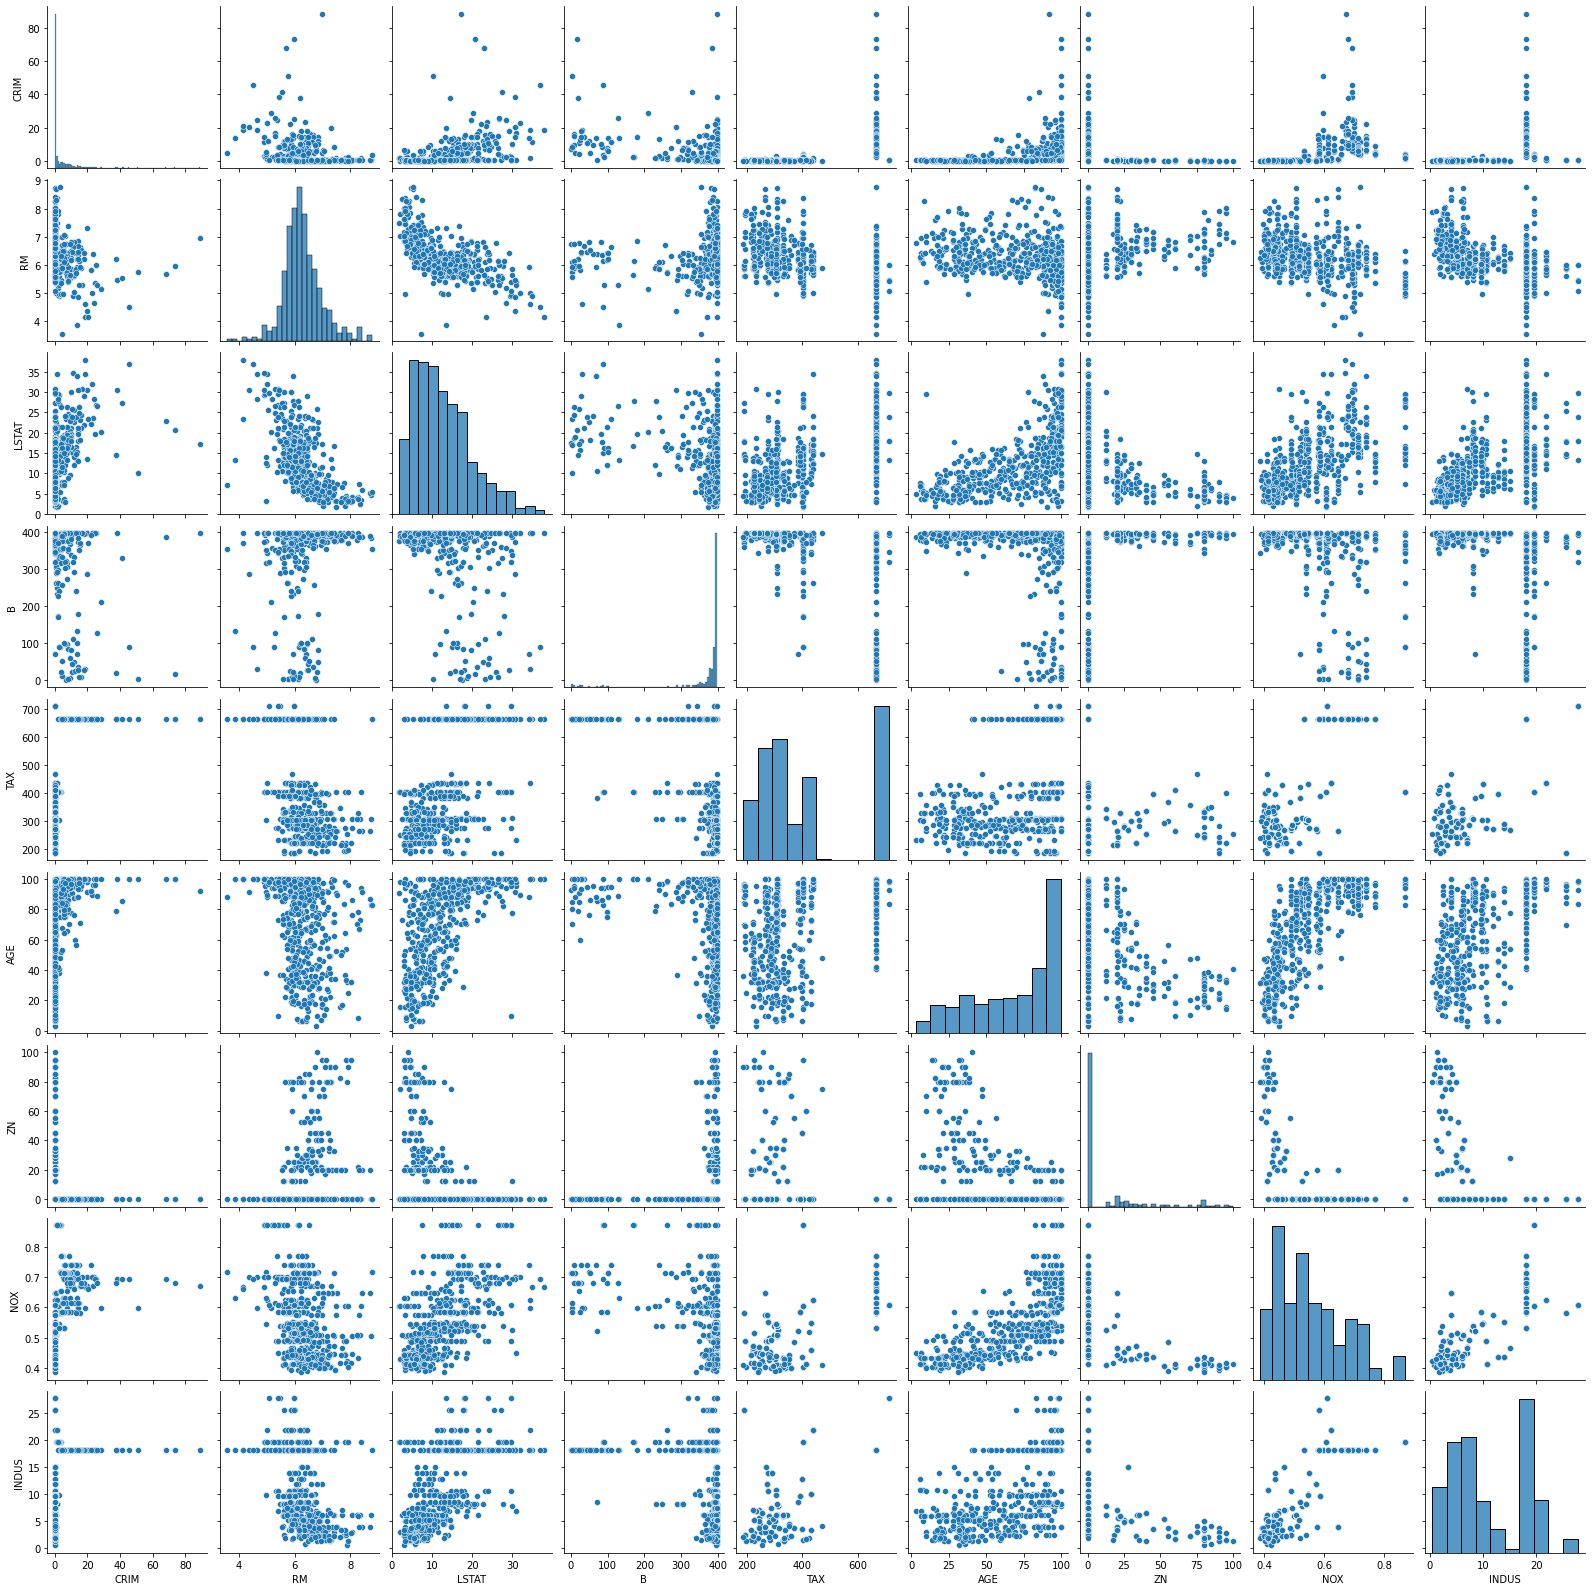

In [75]:
# 변수별 산점도 시각화
sns.pairplot(x_data2)
plt.show()

---
---

## 03. 다중공선성 확인(VIF)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [70]:
# VIF 가장 높은 NOX 변수 제거 후 VIF 확인
vif = pd.DataFrame()
x_data3 = x_data2.drop('NOX', axis=1)
vif['VIF Factor'] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


#### 해석
- 당연히 변수가 줄어들었기에 VIF 줄은 것 확인 가능하다.
- RM의 다중공선성이 되게 높은데, 위에서 확인했던 pvalue나 상관계수 등을 확인하면, RM은 중요한 변수일 가능성이 높음으로 여기서 멈추는 것이 맞다.

---
---

# 05. VIF 참고해서 변수제거하면서 분석

In [63]:
# VIF 가장 높은 RM 변수 제거 후 VIF 확인
vif = pd.DataFrame()
x_data4 = x_data3.drop('RM', axis=1)
vif['VIF Factor'] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif 

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [71]:
# NOX 변수 제거한 데이터로 회귀모델 적합시켜봐서 확인
x_data3_ = sm.add_constant(x_data3, has_constant='add')
model_vif1 = sm.OLS(target,x_data3_)
fitted_model_vif1 = model_vif1.fit()

In [72]:
fitted_model_vif1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          7.62e-112
Time:                        17:43:38   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 해석
- R-squared 값 변동이 거의 없다. = NOX가 차지하는 변동성이 굉장히 적었다.

In [73]:
# NOX, RM 변수 제거한 데이터(x_data4) 상수항 추가 후 회귀 모델 적합
x_data4_ = sm.add_constant(x_data4, has_constant='add')
model_vif2 = sm.OLS(target, x_data4_)
fitted_model_vif2 = model_vif2.fit()

In [74]:
fitted_model_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           5.53e-89
Time:                        17:45:24   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 해석
- RM 변수는 제거하면 안되는 중요변수였다.
    - R-squared 값 굉장히 감소하였다.
    - AIC는 낮을수록 좋은데 그 값 또한 증가하였다.

---
---

## 06.적합시킨 모델로 예측

### 06-1 x_data2_ 로 예측 (full 모델)

In [77]:
from sklearn.model_selection import train_test_split 
X = x_data2_
y = target

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((354, 10), (152, 10), (354, 1), (152, 1))

In [79]:
# train_x에 회귀모델 적합
fit_1 = sm.OLS(train_y, train_x)
fit_1 = fit_1.fit()

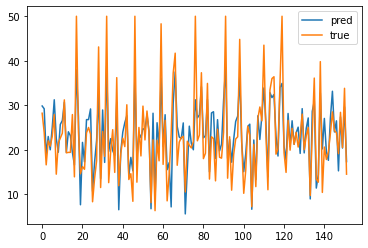

In [80]:
# 잔차 확인

plt.plot(np.array(fit_1.predict(test_x)),label="pred")
plt.plot(np.array(test_y),label="true")
plt.legend()
plt.show()

### 06-2 x_data3_로 예측(NOX제거)

In [81]:
X = x_data3_
y = target

train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape

((354, 9), (152, 9), (354, 1), (152, 1))

In [82]:
fit_2 = sm.OLS(train_y2, train_x2)
fit_2 = fit_2.fit()

### 06-3 x_data4_로 예측(NOX, RM제거)

In [83]:
X = x_data4_
y = target

train_x3, test_x3, train_y3, test_y3 = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
train_x3.shape, test_x3.shape, train_y3.shape, test_y3.shape

((354, 8), (152, 8), (354, 1), (152, 1))

In [84]:
fit_3 = sm.OLS(train_y3, train_x3)
fit_3 = fit_3.fit()

### 06-4 세 모델 비교

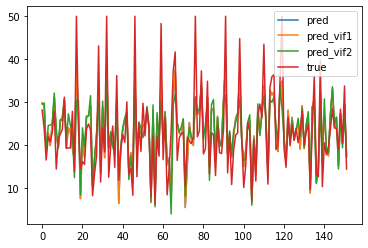

In [85]:
## true값과 예측값 비교 시각화
plt.plot(np.array(fit_1.predict(test_x)),label="pred")
plt.plot(np.array(fit_2.predict(test_x2)),label="pred_vif1")
plt.plot(np.array(fit_3.predict(test_x3)),label="pred_vif2")
plt.plot(np.array(test_y),label="true")
plt.legend()
plt.show()

=> 눈으로 보기 힘들다

In [93]:
# MSE를 통한 검증데이터에 대한 성능비교

from sklearn.metrics import mean_squared_error

pred = mean_squared_error(y_true = test_y['Target'], y_pred = fit_1.predict(test_x))
pred_vif1 = mean_squared_error(y_true = test_y['Target'], y_pred = fit_2.predict(test_x2))
pred_vif2 = mean_squared_error(y_true = test_y['Target'], y_pred = fit_3.predict(test_x3))

In [95]:
pd.DataFrame({'pred':pred, 'pred_vif1':pred_vif1, 'pred_vif2':pred_vif2},index=['value'])

,pred,pred_vif1,pred_vif2
value,26.148631,26.140063,38.788453


#### 해석
- 변수 하나 제거한 모델이 가장 좋은 성능을 가진다.
    - 변수는 적을수록 좋다.
    - mse가 작은 모델은 pred1, pred_vif1 이다.